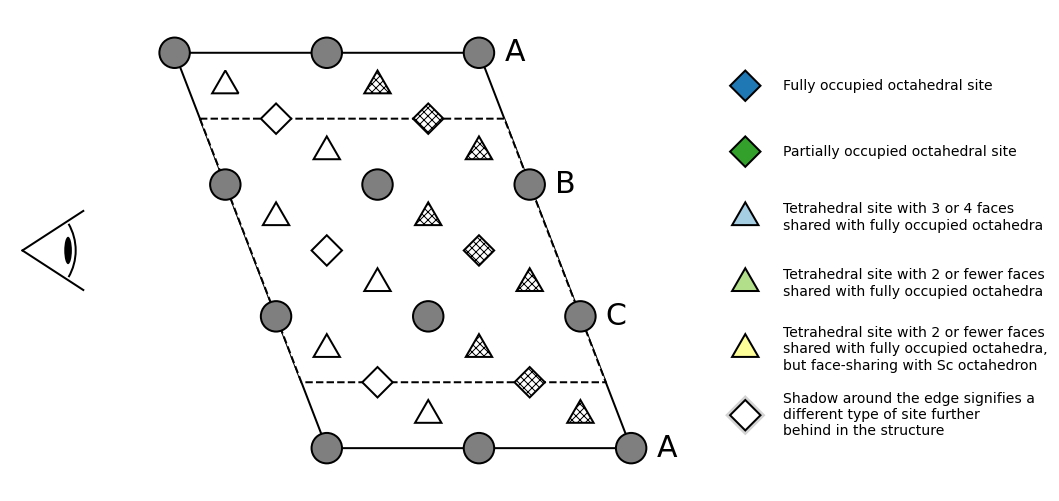

In [148]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.lines import Line2D
import matplotlib.patheffects as PathEffects
from site_plot import Site
import numpy as np
from matplotlib import cm
col = cm.get_cmap('Paired')

coeff = 0.866

ticks = []

fig, ax = plt.subplots(figsize=(18,36))
ax.set_aspect('equal', adjustable='box')
ax.axis('off')

verts = [
   (0, 3*coeff),  # left, bottom
   (2, 3*coeff),  # left, top
   (3, 0),  # right, top
   (1, 0),  # right, bottom
   (0, 3*coeff),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

verts2 = [
   (1/6, 2.5*coeff),  # left, bottom
   (13/6, 2.5*coeff),  # left, top
   (17/6, 0.5*coeff),  # right, top
   (5/6, 0.5*coeff),  # right, bottom
   (1/6, 2.5*coeff),  # ignored
]

codes2 = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path2 = Path(verts2, codes2)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(0-1.1, 5.5)
ax.set_ylim(0-0.3, 3*coeff+0.3)

patch = patches.PathPatch(path, facecolor='white', lw=2)
patch2 = patches.PathPatch(path2, facecolor='white', lw=2, linestyle='--')
ax.add_patch(patch)
ax.add_patch(patch2)

ccp = [[0,3*coeff], [1,3*coeff], [2,3*coeff], [1/3,2*coeff], [2/3,coeff], [1,0], [4/3,2*coeff], [5/3,coeff], [2,0], [7/3,2*coeff], [8/3,coeff], [3,0]]
octahedra = [[2/3,2.5*coeff], [1,1.5*coeff], [4/3,0.5*coeff], [5/3,2.5*coeff], [2,1.5*coeff], [7/3,0.5*coeff]]
tetrahedra_front = [[1/3,2.75*coeff], [1,2.25*coeff], [2/3,1.75*coeff], [4/3,1.25*coeff], [1,0.75*coeff], [5/3,0.25*coeff]]
tetrahedra_back = [[4/3,2.75*coeff], [2,2.25*coeff], [5/3,1.75*coeff], [7/3,1.25*coeff], [2,0.75*coeff], [8/3,0.25*coeff]]

for coord in ccp:
    ax.add_patch(patches.Circle(((coord[0]), (coord[1])), 0.1, facecolor='tab:grey', edgecolor='black', linewidth=2))
for coord in octahedra:
    if coord[0] < 5/3:
        ax.add_patch(patches.RegularPolygon(((coord[0]), (coord[1])), 4, 0.1, facecolor='white', edgecolor='black', linewidth=2))
    else:
        ax.add_patch(patches.RegularPolygon(((coord[0]), (coord[1])), 4, 0.1, facecolor='white', edgecolor='black', linewidth=2, hatch='xxx'))
for coord in tetrahedra_front:
    ax.add_patch(patches.RegularPolygon(((coord[0]), (coord[1])), 3, 0.1, facecolor='white', edgecolor='black', linewidth=2))
for coord in tetrahedra_back:
    ax.add_patch(patches.RegularPolygon(((coord[0]), (coord[1])), 3, 0.1, facecolor='white', edgecolor='black', linewidth=2, hatch='xxx'))
    
ax.text(13/6, 3*coeff, 'A', size=30, va='center')
ax.text(15/6, 2*coeff, 'B', size=30, va='center')
ax.text(17/6, 1*coeff, 'C', size=30, va='center')
ax.text(19/6, 0*coeff, 'A', size=30, va='center')

ax.add_line(Line2D((-1, -0.6), (1.5*coeff, 1.8*coeff), color='black', linewidth=2))
ax.add_line(Line2D((-1, -0.6), (1.5*coeff, 1.2*coeff), color='black', linewidth=2))
ax.add_patch(patches.Arc((-1, 1.5*coeff), 0.7, 0.7, 90, 240, 300, color='black', linewidth=2))
ax.add_patch(patches.Ellipse((-0.7, 1.5*coeff), 0.05, 0.18, fc='black'))

ax.add_patch(patches.RegularPolygon((3.75, 2.75*coeff), 4, 0.1, facecolor=col(1), edgecolor='black', linewidth=2))
ax.text(4, 2.75*coeff, 'Fully occupied octahedral site', size=14, va='center')
ax.add_patch(patches.RegularPolygon((3.75, 2.25*coeff), 4, 0.1, facecolor=col(3), edgecolor='black', linewidth=2))
ax.text(4, 2.25*coeff, 'Partially occupied octahedral site', size=14, va='center')
ax.add_patch(patches.RegularPolygon((3.75, 1.75*coeff), 3, 0.1, facecolor=col(0), edgecolor='black', linewidth=2))
ax.text(4, 1.75*coeff, 'Tetrahedral site with 3 or 4 faces \nshared with fully occupied octahedra', size=14, va='center')
ax.add_patch(patches.RegularPolygon((3.75, 1.25*coeff), 3, 0.1, facecolor=col(2), edgecolor='black', linewidth=2))
ax.text(4, 1.25*coeff, 'Tetrahedral site with 2 or fewer faces \nshared with fully occupied octahedra', size=14, va='center')
ax.add_patch(patches.RegularPolygon((3.75, 0.75*coeff), 3, 0.1, facecolor=col(10), edgecolor='black', linewidth=2))
ax.text(4, 0.75*coeff, 'Tetrahedral site with 2 or fewer faces \nshared with fully occupied octahedra, \nbut face-sharing with Sc octahedron', size=14, va='center')

legend = ax.add_patch(patches.RegularPolygon((3.75, 0.25*coeff), 4, 0.1, facecolor='white', edgecolor='black', linewidth=2))
legend.set_path_effects([PathEffects.withStroke(linewidth=7, foreground='lightgrey')])
ax.text(4, 0.25*coeff, 'Shadow around the edge signifies a \ndifferent type of site further \nbehind in the structure', size=14, va='center')

plt.savefig('legend.jpg', bbox_inches='tight', dpi=500)

###### 